In [129]:
#importing the neccesary library

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [131]:
#collection the data and read the data

In [132]:
df1= pd.read_csv("Calories.csv")

In [133]:
#show first 3 row of data

In [134]:
df1.head(3)

,User_ID,Calories
0,14733363,231
1,14861698,66
2,11179863,26


In [135]:
df2= pd.read_csv("Exercise.csv")

In [136]:
df2.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190,94,29,105,40.8
1,14861698,female,20,166,60,14,94,40.3
2,11179863,male,69,179,79,5,88,38.7


In [137]:
#concatinate of two datset

In [138]:
df= pd.concat([df2, df1["Calories"]], axis= 1) 

In [139]:
df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26


In [140]:
#check null value or not

In [141]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [142]:
#how many rows and columns are there

In [143]:
df.shape

(15000, 9)

In [144]:
#some statistical measure

In [145]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [147]:
#data visulization

In [148]:
#plotting the gender columns the countplot

In [149]:
sns.set()

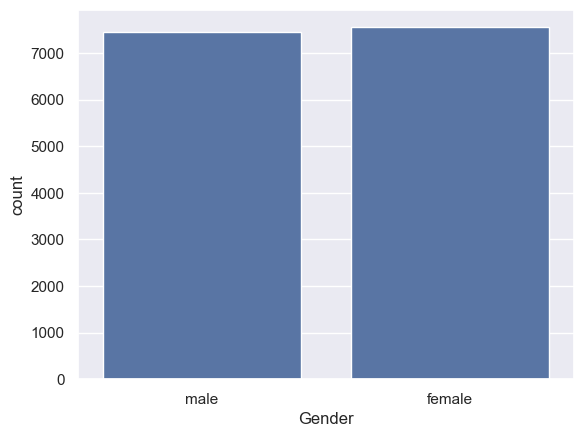

In [150]:
sns.countplot(x= "Gender", data= df)
plt.show()

In [151]:
#distplot on age columns

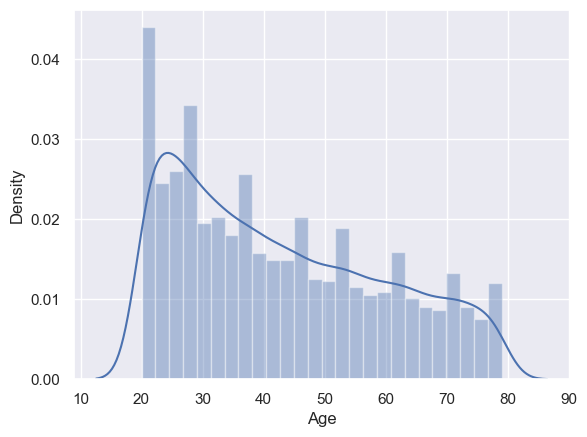

In [152]:
sns.distplot(df["Age"])
plt.show()

In [153]:
#distribution on height variable

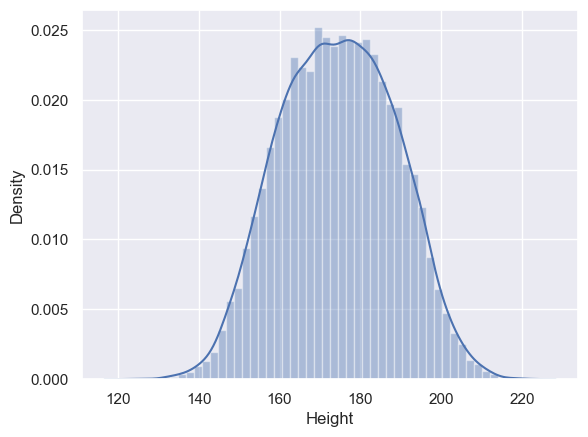

In [154]:
sns.distplot(df["Height"])
plt.show()

In [155]:
#distribution on weight variable

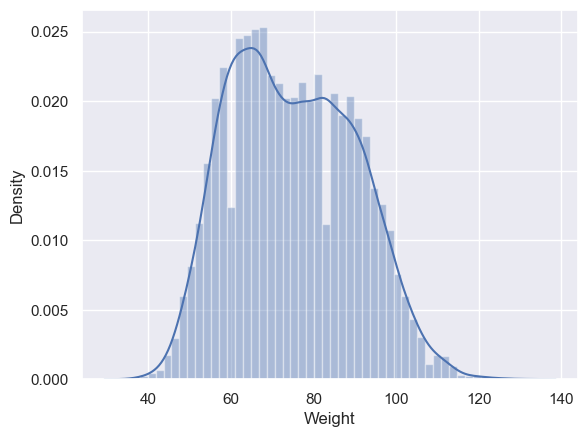

In [156]:
sns.distplot(df["Weight"])
plt.show()

In [157]:
#find correlation

In [158]:
correlation= df.select_dtypes(include=[float, int]).corr()

In [159]:
#construct the heatmap understand the correlation

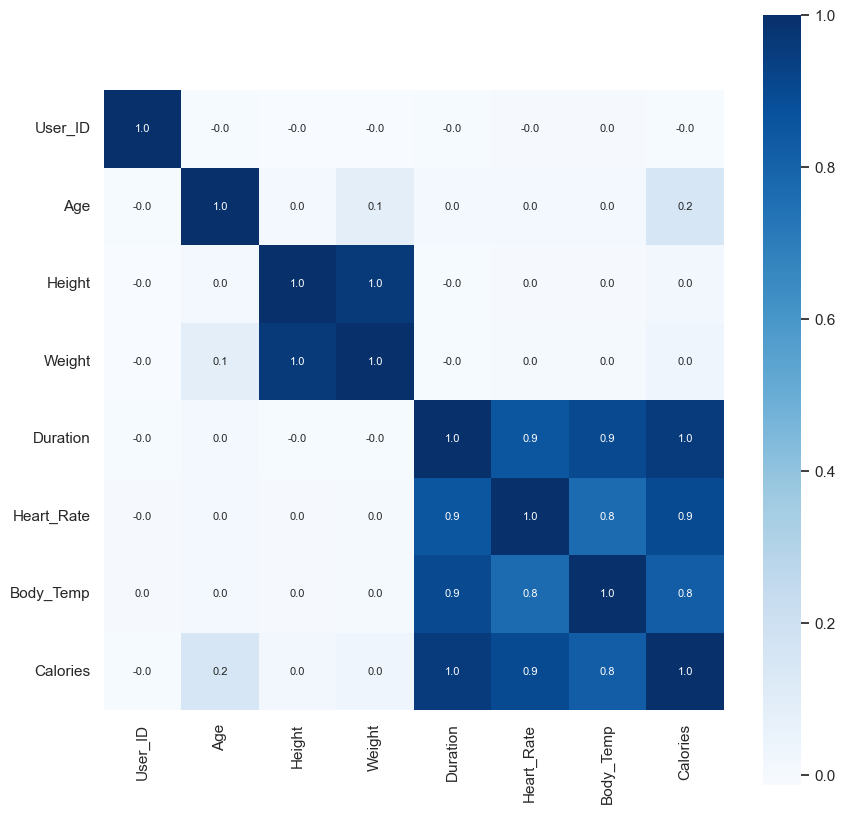

In [160]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar= True, square= True, fmt= ".1f", annot= True, annot_kws= {"size": 8}, cmap= "Blues")
plt.show()

In [161]:
#converting the text data into numerical data

In [176]:
df.replace({"Gender": {"male": 0, "female": 1}}, inplace= True)

In [178]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,1,34,179,71,13,100,40.5,71
4,17771927,1,27,154,58,10,81,39.8,35


In [163]:
#seprate the data X and y

In [180]:
X= df.drop(columns= ["User_ID", "Calories"], axis= 1)
Y= df["Calories"]

In [182]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68     190      94        29         105       40.8
1           1   20     166      60        14          94       40.3
2           0   69     179      79         5          88       38.7
3           1   34     179      71        13         100       40.5
4           1   27     154      58        10          81       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20     193      86        11          92       40.4
14996       1   27     165      65         6          85       39.2
14997       1   43     159      58        16          90       40.1
14998       0   78     193      97         2          84       38.3
14999       0   63     173      79        18          92       40.5

[15000 rows x 7 columns]


In [184]:
print(Y)

0        231
1         66
2         26
3         71
4         35
        ... 
14995     45
14996     23
14997     75
14998     11
14999     98
Name: Calories, Length: 15000, dtype: int64


In [186]:
#splitting the data train and test

In [188]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 42, test_size= 0.2)

In [190]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [192]:
#build the model

In [194]:
xgb= XGBRegressor()

In [196]:
#train the model

In [198]:
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [202]:
#prediction on test data

In [208]:
test_pred= xgb.predict(X_test)

In [210]:
print(test_pred)

[172.07645  195.7858    51.708874 ... 121.50776   19.239851 214.43597 ]


In [212]:
#find the mean absolute error

In [214]:
mae= metrics.mean_absolute_error(Y_test, test_pred)

In [216]:
print(mae)

1.4981198125282924
